In [ ]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#  1. Data Requirement and Data Collection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.listdir(os.getcwd())

['.config', 'gdrive', 'sample_data']

In [ ]:
dfr_cardio = pd.read_csv('/content/gdrive/MyDrive/Spatial Machine Learning Python/cardio_train.csv',sep=';')
dfr_cardio.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
total_data=len(dfr_cardio.count('columns'))
total_data

70000

In [6]:
print(type(dfr_cardio.columns))
print(type(dfr_cardio.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [10]:
#dfr_cardio.drop("id",axis=1,inplace=True)

In [7]:
print("Terdapat {} data yang ber-duplicate".format(dfr_cardio.duplicated().sum()))
print("Terdapat {} data yang hilang di data frame".format(dfr_cardio.isnull().sum().sum()))

Terdapat 0 data yang ber-duplicate
Terdapat 0 data yang hilang di data frame


# 2.Data Visualization for Data Understanding

In [8]:
dfr_cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


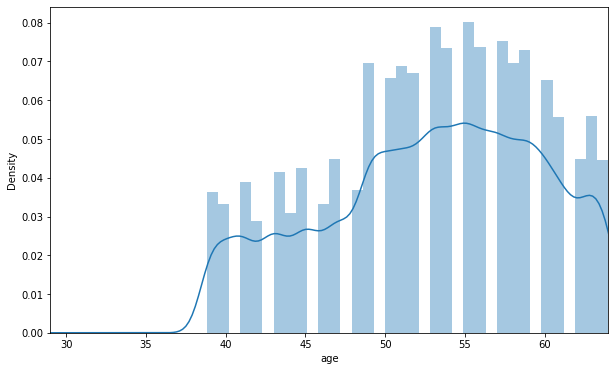

In [9]:
#histogram dari umur
dfr_cardio.loc[:, 'age'] = dfr_cardio.loc[:, 'age'].apply(lambda x: int(x/365))

fig, ax = plt.subplots(figsize = (10, 6))

sns.distplot(dfr_cardio['age'])
plt.xlim(dfr_cardio['age'].min(),
         dfr_cardio['age'].max())

plt.subplots_adjust(hspace= 0.6)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

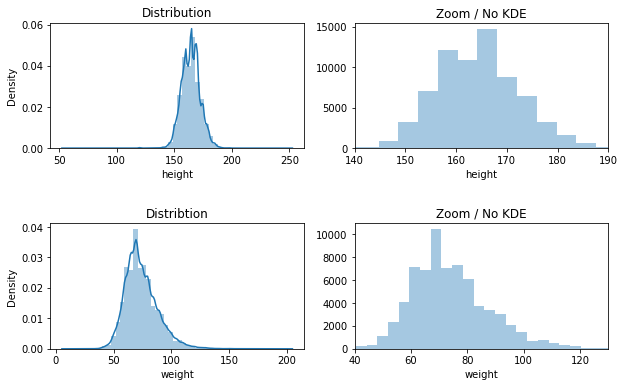

In [11]:
#histogram with and without KDE (kernel density estimation) for height & weight
fig, ax = plt.subplots(figsize = (10, 6))

plt.subplot(2,2,1)
sns.distplot(dfr_cardio['height'])
plt.title('Distribution')

plt.subplot(2,2,2)
sns.distplot(dfr_cardio['height'], kde= False, )
plt.xlim(140, 190)
plt.title('Zoom / No KDE')

plt.subplot(2,2,3)
sns.distplot(dfr_cardio['weight'])
plt.title('Distribtion')

plt.subplot(2,2,4)
sns.distplot(dfr_cardio['weight'], kde= False)
plt.xlim(40, 130)
plt.title('Zoom / No KDE')

plt.subplots_adjust(hspace= 0.6)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


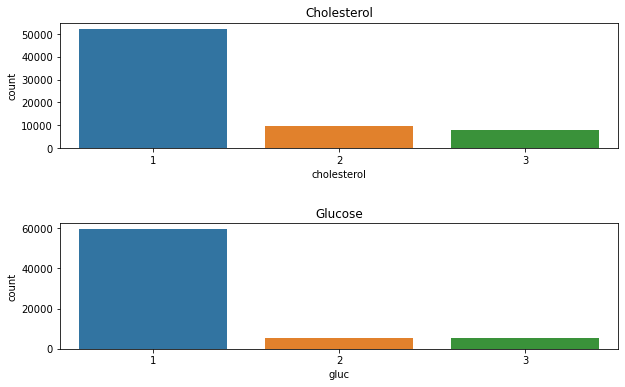

In [ ]:
#barchart for cholesterol & glucose
fig, ax = plt.subplots(figsize = (10, 6))

plt.subplot(2,1,1)
sns.countplot('cholesterol', data= dfr_cardio)
plt.title('Cholesterol')

plt.subplot(2,1,2)
sns.countplot('gluc', data= dfr_cardio)
plt.title('Glucose')

plt.subplots_adjust(hspace= 0.6)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

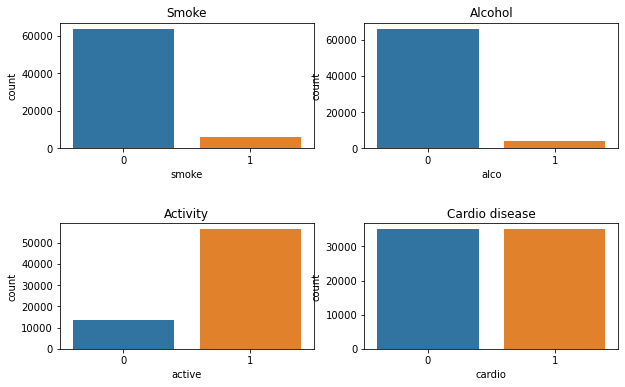

In [ ]:
#cardio & non cardio comparison based on category
fig, ax = plt.subplots(figsize = (10, 6))

plt.subplot(2,2,1)
sns.countplot('smoke', data= dfr_cardio)
plt.title('Smoke')

plt.subplot(2,2,2)
sns.countplot('alco', data= dfr_cardio)
plt.title('Alcohol')

plt.subplot(2,2,3)
sns.countplot('active', data= dfr_cardio)
plt.title('Activity')

plt.subplot(2,2,4)
sns.countplot('cardio', data= dfr_cardio)
plt.title('Cardio disease')

plt.subplots_adjust(hspace= 0.6)
plt.show()

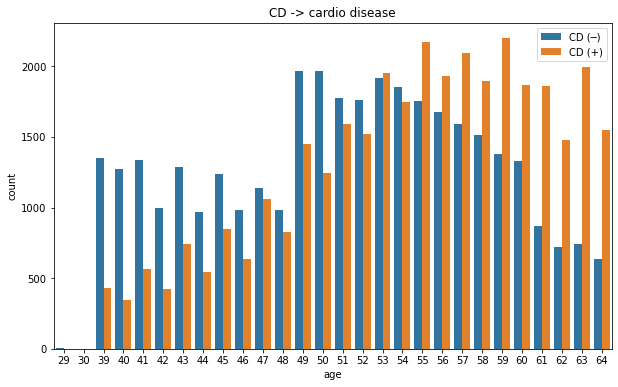

In [ ]:
#comparison cd+ and cd- for each age
fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot(x= 'age', hue= 'cardio', data= dfr_cardio)
plt.title('CD -> cardio disease')
plt.legend(['CD (─)', 'CD (+)'],
           loc= 'upper right')

plt.subplots_adjust(hspace= 0.3)
plt.show()

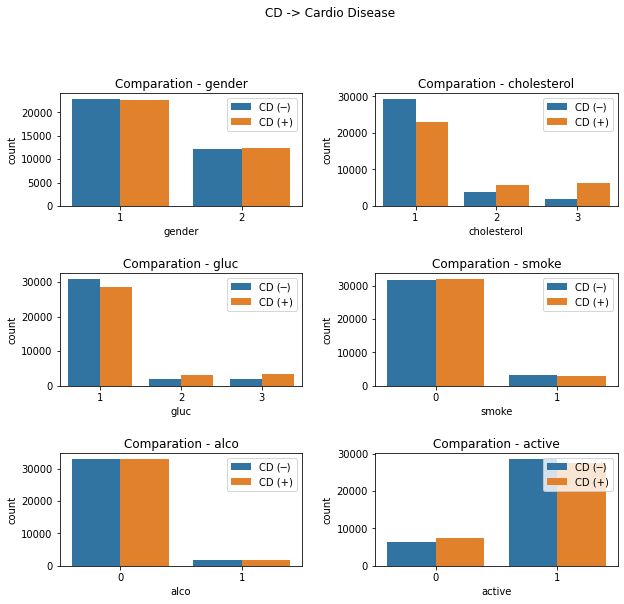

In [12]:
#comparison cd+ and cd- for each category in gende, cholesterol, glucose, smoke, alcohol, active
def habitPlot(dataframe, col):
    sns.countplot(x= col,
                  hue= 'cardio',
                  data= dfr_cardio)
    plt.title('Comparation - {}'.format(col))
    plt.legend(['CD (─)', 'CD (+)'],
               loc= 'upper right')
data=dfr_cardio
fig, ax = plt.subplots(figsize = (10, 12))
fig.suptitle('CD -> Cardio Disease')

plt.subplot(4,2,1)
habitPlot(data, 'gender')

plt.subplot(4,2,2)
habitPlot(data, 'cholesterol')

plt.subplot(4,2,3)
habitPlot(data, 'gluc')

plt.subplot(4,2,4)
habitPlot(data, 'smoke')

plt.subplot(4,2,5)
habitPlot(data, 'alco')

plt.subplot(4,2,6)
habitPlot(data, 'active')

plt.subplots_adjust(hspace= 0.6, wspace= 0.3)
plt.show()

# 3. Analyzing Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

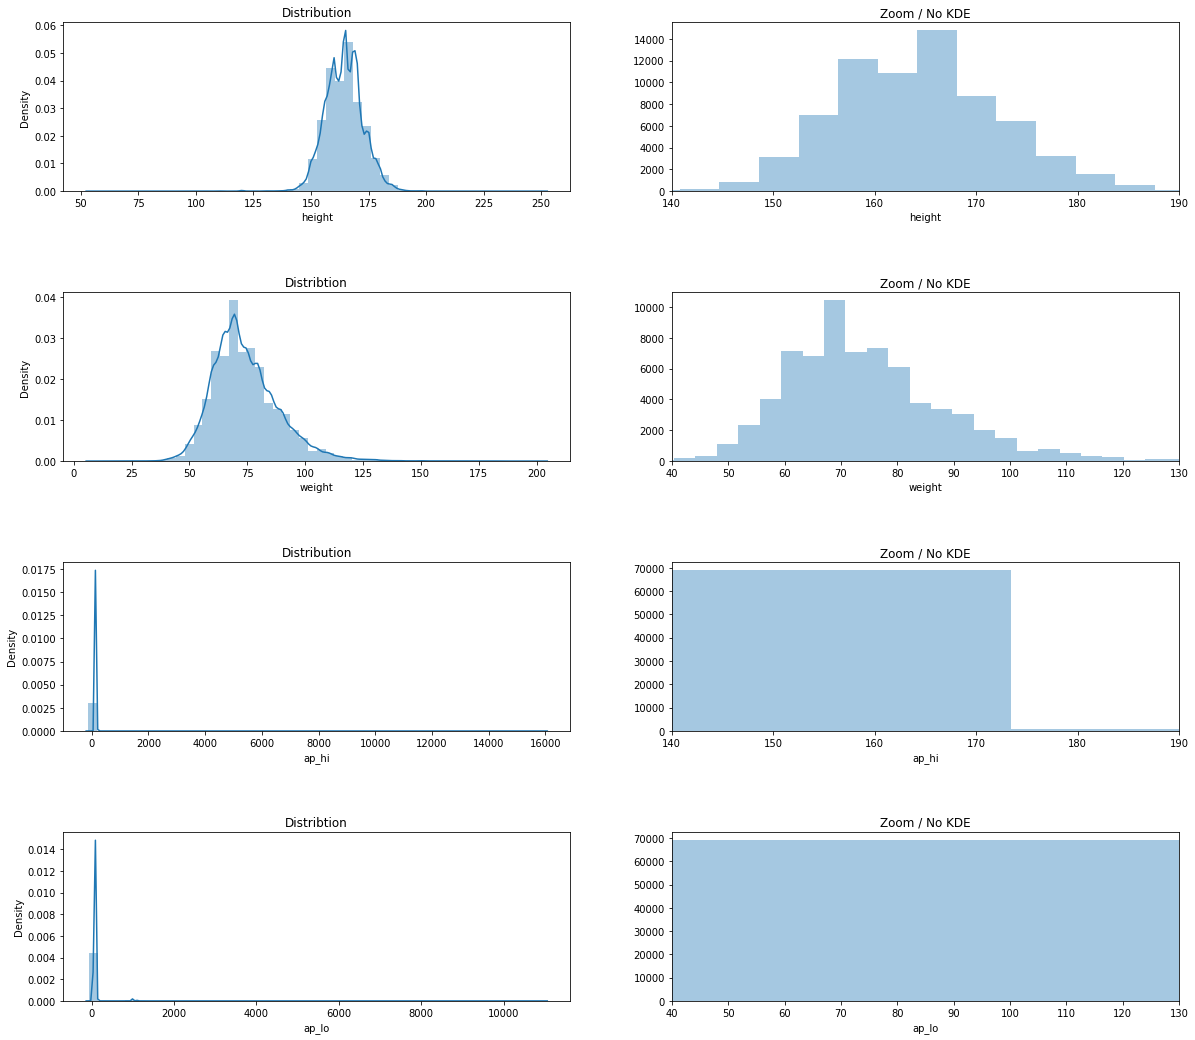

In [19]:
#histogram with and without KDE (kernel density estimation)
fig, ax = plt.subplots(figsize = (20, 18))

plt.subplot(4,2,1)
sns.distplot(dfr_cardio['height'])
plt.title('Distribution')

plt.subplot(4,2,2)
sns.distplot(dfr_cardio['height'], kde= False, )
plt.xlim(140, 190)
plt.title('Zoom / No KDE')

plt.subplot(4,2,3)
sns.distplot(dfr_cardio['weight'])
plt.title('Distribtion')

plt.subplot(4,2,4)
sns.distplot(dfr_cardio['weight'], kde= False)
plt.xlim(40, 130)
plt.title('Zoom / No KDE')

plt.subplot(4,2,5)
sns.distplot(dfr_cardio['ap_hi'])
plt.title('Distribution')

plt.subplot(4,2,6)
sns.distplot(dfr_cardio['ap_hi'], kde= False, )
plt.xlim(140, 190)
plt.title('Zoom / No KDE')

plt.subplot(4,2,7)
sns.distplot(dfr_cardio['ap_lo'])
plt.title('Distribtion')

plt.subplot(4,2,8)
sns.distplot(dfr_cardio['ap_lo'], kde= False)
plt.xlim(40, 130)
plt.title('Zoom / No KDE')

plt.subplots_adjust(hspace= 0.6)
plt.show()

Di Kolom USIA, TINGGI BADAN, Tekanan Darah Sistolik (ap_hi), Tekanan Darah Diastolik (ap_lo) terdapat STD yg tinggi kemungkinan besar terjadi outlier/ anomali

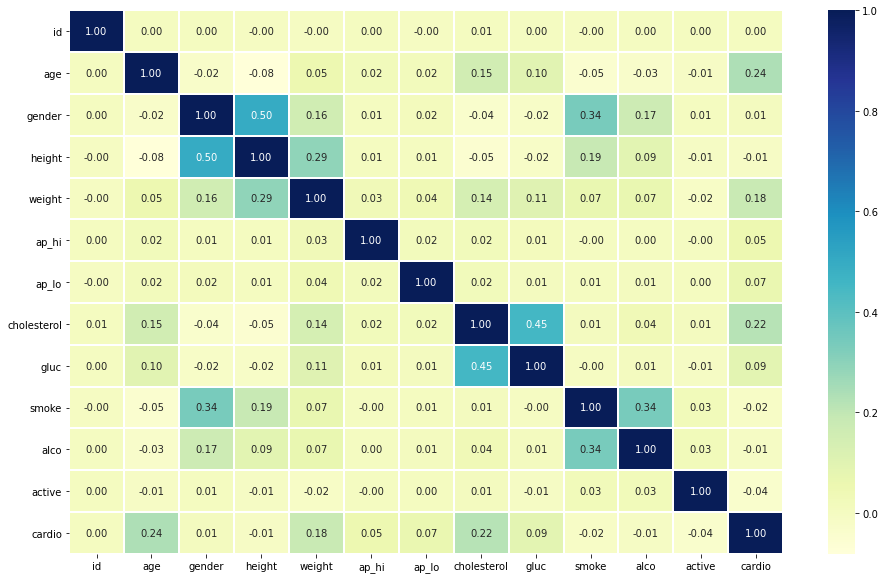

In [ ]:
corr = dfr_cardio.corr()
f, ax = plt.subplots(figsize = (16,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", linewidths=1, ax=ax, cmap="YlGnBu")

Menurut Riset dari Ilmu kedokteran bahwa faktor-faktor yang mempengaruhi cardio adalah = Usia, Kolesterol, Tekanan Darah Sistolik (ap_hi) yang tinggi, Tekanan Darah Diastolik (ap_lo) yang tinggi, rokok

Tapi yang terlihat pada Diagram Heat map adalah cuma : usia, Berat badan, Kolesterol saja

# Data Visualization in Model selection

In [20]:
x = dfr_cardio.copy(deep=True)
x.drop("id",axis=1,inplace=True)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [21]:
y = x["cardio"]
y.shape

(70000,)

In [22]:
x.drop("cardio", axis=1,inplace=True)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


### Model Selection

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
# svm = SVC(random_state=1)
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SGD" : sgd,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [26]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.712786
KNN,0.712000
SGD,0.699714
Decision tree,0.636643
Naive bayes,0.622429


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

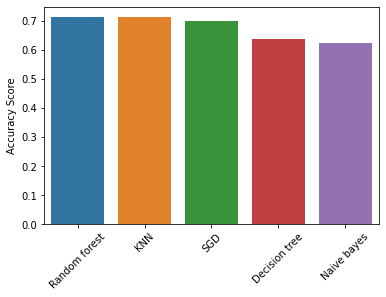

In [27]:
# plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45) # Rotation of Country names...

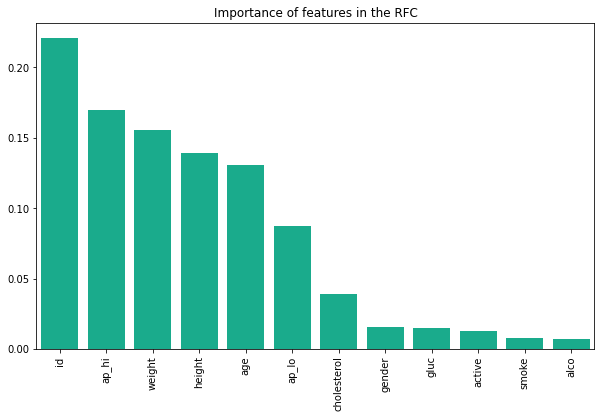

In [28]:
rfc = RandomForestClassifier()
rfc.fit(data.drop(['cardio'], axis= 1), data['cardio'])

# Discovering the importance of features in the model
tmp = pd.DataFrame({'Columns': data.drop(['cardio'], axis= 1).columns,
                    'Importance': rfc.feature_importances_})
tmp = tmp.sort_values(by = 'Importance', ascending = False)

# Plotting a graph about it
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(data = tmp,
             x = 'Columns',
             y = 'Importance',
           color = '#02c39a')
plt.title('Importance of features in the RFC')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('')

plt.show()

### Tes Accuracy

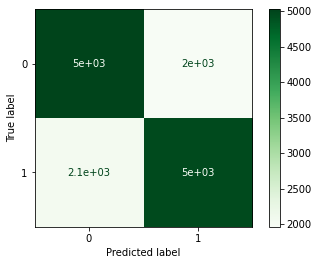

In [29]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(ran, x_test, y_test,cmap=plt.cm.Greens)

### Neural Network

In [30]:
x.shape

(70000, 11)

In [31]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta,Adam
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(6, input_dim=11, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [33]:
optimizer = RMSprop(learning_rate=0.002)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)

In [ ]:
"""
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='val_loss',    # Quantity to be monitored.
    factor=0.1,       # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=50,        # The number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,         # 0: quiet - 1: update messages.
    mode="auto",       # {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
                       # in the max mode it will be reduced when the quantity monitored has stopped increasing; 
                       # in auto mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.0001,  # threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,        # number of epochs to wait before resuming normal operation after learning rate (lr) has been reduced.
    min_lr=0.00001     # lower bound on the learning rate.
    )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=400, restore_best_weights=True)
history = model.fit(x=x_train, y=y_train.values,
                    batch_size=1024, epochs=1500,
                    verbose=0,validation_data=(x_test,y_test.values),
                    callbacks=[learning_rate_reduction, es],
                    shuffle=True)

model.evaluate(x_test, y_test.values, verbose=2)
"""

In [34]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='val_loss',factor=0.1, patience=50, verbose=1,        
    mode="auto", min_delta=0.0001, cooldown=0, min_lr=0.00001) 
           
    

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=400, restore_best_weights=True)
history = model.fit(x=x_train, y=y_train.values,
                    batch_size=1024, epochs=1500,
                    verbose=0,validation_data=(x_test,y_test.values),
                    callbacks=[learning_rate_reduction, es],
                    shuffle=True)

model.evaluate(x_test, y_test.values, verbose=2)


Epoch 00438: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 00489: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.

Epoch 00539: ReduceLROnPlateau reducing learning rate to 1e-05.
438/438 - 0s - loss: 0.5616 - accuracy: 0.7235


[0.5615553259849548, 0.7235000133514404]

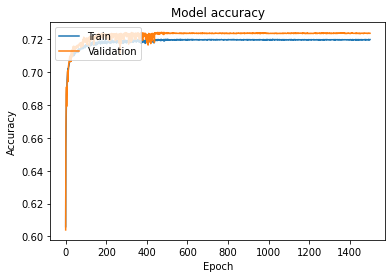

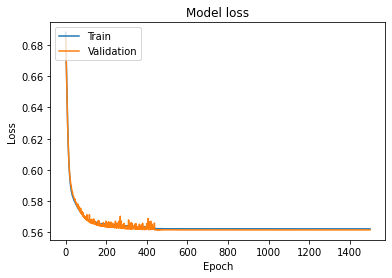

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()